# ANN, including Cys-epitopes

In [1]:
import json
import os
from copy import deepcopy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

%load_ext autoreload
%autoreload 2

2025-04-01 20:03:33.733834: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 20:03:33.740611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743552213.749311  120803 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743552213.752198  120803 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 20:03:33.760788: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## dataset

In [2]:
infile = '/home/yuan/results/epitope/epi_top_features.txt'
df = pd.read_csv(infile, sep='\t', header=0, index_col=None)
# balance the number of epitopes and non-epitopes
# shuffle rows
df = df.sample(frac=1)
df.head()

,seq,label,mean_hydro_ph7,mean_hydro,mean_polar,mean_polar_stab,mean_VDWV,median_hydro_ph7,median_hydro,median_polar,...,has_N,has_D,has_C,has_I,has_L,has_K,has_F,has_T,has_Y,has_V
2182094,EVQSSGLIKPNA,1,13.750000,0.790000,8.766667,0.124750,2.780833,-5.0,0.540,9.1,...,1,0,0,1,1,1,0,0,0,1
1951754,NYLSHHLTI,1,39.111111,0.948889,7.933333,0.180000,3.882222,13.0,0.610,8.6,...,1,0,0,1,1,0,0,1,1,0
165512,RAAAPQAW,1,23.875000,0.955000,8.350000,0.149375,3.110000,41.0,0.610,8.1,...,0,0,0,0,0,0,0,0,0,0
1297514,AMTGLSAAAAGLALN,1,39.400000,0.648667,7.760000,0.090600,1.972000,41.0,0.610,8.1,...,1,0,0,0,1,0,0,1,0,0
2113036,NEILFPFY,1,44.250000,1.518750,7.325000,0.208250,4.462500,80.0,1.915,5.7,...,1,0,0,1,1,0,1,0,1,0


## training hasCys

In [3]:
# keep epitopes container Cys
feature = 'has_C'
print('entire data:', df.shape)
print('epitopes without Cys:', df[(df[feature]==0) & (df['label']==1)].shape)
print('epitopes having Cys:', df[(df[feature]==1) & (df['label']==1)].shape)
# sub_df = df[~((df[feature]==0) & (df['label']==1))]
sub_df = df[df[feature]==1]
print('filtered data:', sub_df.shape)

entire data: (2490831, 48)
epitopes without Cys: (1586519, 48)
epitopes having Cys: (212276, 48)
filtered data: (370642, 48)


In [4]:
from my_ann import MyAnn
# prepare 
c = MyAnn()
c.get_xy(sub_df)

X: (370642, 46) float16
y: (370642,) float16
labels: Counter({np.float16(1.0): 212276, np.float16(0.0): 158366})
train data: (207559, 46) (207559,)
validate data: (88954, 46) (88954,)
test data (74129, 46) (74129,)


In [5]:
c.declare_model()

I0000 00:00:1743552220.850386  120803 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1164 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        49,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,409 (286.75 KB)

 Trainable params: 73,409 (286.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# train model
c.train(epochs=10)

Epoch 1/10


I0000 00:00:1743552222.003333  120927 service.cc:148] XLA service 0x7d64180050d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743552222.003350  120927 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-01 20:03:42.023968: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743552222.104996  120927 cuda_dnn.cc:529] Loaded cuDNN version 90800


 127/6487 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6364 - auc: 0.6684 - loss: 0.6385 - mse: 0.2233 - precision: 0.6612 - recall: 0.7446

I0000 00:00:1743552222.690479  120927 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6487/6487 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - auc: 0.7655 - loss: 0.5730 - mse: 0.1928 - precision: 0.7336 - recall: 0.7950

E0000 00:00:1743552231.670888  120927 buffer_comparator.cc:157] Difference at 16: 0, expected 260.803
E0000 00:00:1743552231.670912  120927 buffer_comparator.cc:157] Difference at 17: 0, expected 274.951
E0000 00:00:1743552231.670914  120927 buffer_comparator.cc:157] Difference at 18: 0, expected 253.659
E0000 00:00:1743552231.670916  120927 buffer_comparator.cc:157] Difference at 19: 0, expected 257.607
E0000 00:00:1743552231.670917  120927 buffer_comparator.cc:157] Difference at 20: 0, expected 250.262
E0000 00:00:1743552231.670918  120927 buffer_comparator.cc:157] Difference at 21: 0, expected 258.782
E0000 00:00:1743552231.670919  120927 buffer_comparator.cc:157] Difference at 22: 0, expected 253.591
E0000 00:00:1743552231.670920  120927 buffer_comparator.cc:157] Difference at 23: 0, expected 258.759
E0000 00:00:1743552231.670921  120927 buffer_comparator.cc:157] Difference at 24: 0, expected 259.406
E0000 00:00:1743552231.670922  120927 buffer_comparator.cc:157] Difference at 25: 

6487/6487 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7169 - auc: 0.7655 - loss: 0.5730 - mse: 0.1928 - precision: 0.7336 - recall: 0.7950 - val_accuracy: 0.7597 - val_auc: 0.8061 - val_loss: 0.5291 - val_mse: 0.1741 - val_precision: 0.7723 - val_recall: 0.8216
Epoch 2/10
6487/6487 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7591 - auc: 0.8079 - loss: 0.5269 - mse: 0.1728 - precision: 0.7726 - recall: 0.8212 - val_accuracy: 0.7587 - val_auc: 0.8120 - val_loss: 0.5231 - val_mse: 0.1718 - val_precision: 0.7600 - val_recall: 0.8441
Epoch 3/10
6487/6487 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7671 - auc: 0.8154 - loss: 0.5183 - mse: 0.1691 - precision: 0.7769 - recall: 0.8318 - val_accuracy: 0.7696 - val_auc: 0.8178 - val_loss: 0.5156 - val_mse: 0.1679 - val_precision: 0.7906 - val_recall: 0.8117
Epoch 4/10
6487/6487 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7702 - auc: 0.8193 - loss: 0.5133 - mse: 0.1672 - precision: 0.7794 - recall: 0.8355 - val_accuracy: 0.7737 - v

,accuracy,auc,loss,mse,precision,recall,val_accuracy,val_auc,val_loss,val_mse,val_precision,val_recall
0,0.736793,0.785864,0.553496,0.184139,0.753605,0.803455,0.759718,0.806076,0.529073,0.174069,0.772302,0.821578
1,0.760328,0.808748,0.525850,0.172304,0.773340,0.823058,0.758673,0.811953,0.523093,0.171763,0.759999,0.844072
2,0.767599,0.815885,0.517533,0.168818,0.777556,0.832742,0.769623,0.817804,0.515596,0.167943,0.790607,0.811659
3,0.771675,0.820625,0.511524,0.166458,0.780608,0.836811,0.773692,0.824366,0.505696,0.164373,0.783490,0.834390
4,0.773881,0.822837,0.508883,0.165183,0.782607,0.838349,0.773332,0.824210,0.506055,0.164839,0.776950,0.846080
5,0.776155,0.825382,0.505785,0.164018,0.784432,0.840383,0.775682,0.825536,0.503565,0.163583,0.788857,0.829253
6,0.777283,0.826812,0.503668,0.163214,0.785342,0.841384,0.775479,0.822235,0.509976,0.165105,0.788332,0.829725
7,0.778328,0.828494,0.501778,0.162374,0.786541,0.841644,0.772264,0.823755,0.513061,0.165681,0.782238,0.833287
8,0.778670,0.829522,0.500577,0.161978,0.786615,0.842325,0.776559,0.827578,0.501503,0.162826,0.784108,0.840156
9,0.780443,0.830540,0.499362,0.161412,0.788300,0.843426,0.775356,0.826497,0.505015,0.163371,0.780330,0.844446


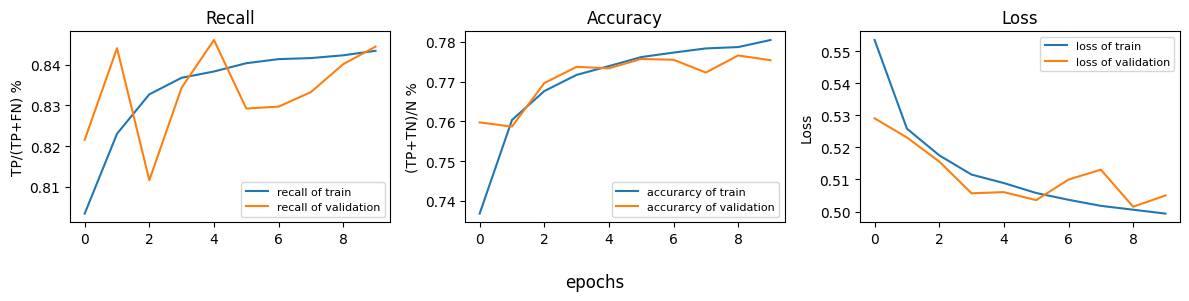

In [7]:
# evaluate model
c.plot_acc_recall()

In [8]:
# evaluate model using test data
c.test()

2280/2317 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7794 - auc: 0.8295 - loss: 0.5007 - mse: 0.1616 - precision: 0.7878 - recall: 0.8446

E0000 00:00:1743552328.287858  120927 buffer_comparator.cc:157] Difference at 16: 1, expected 250.931
E0000 00:00:1743552328.287884  120927 buffer_comparator.cc:157] Difference at 17: 1, expected 269.971
E0000 00:00:1743552328.287887  120927 buffer_comparator.cc:157] Difference at 18: 1, expected 255.02
E0000 00:00:1743552328.287888  120927 buffer_comparator.cc:157] Difference at 19: 0, expected 253.808
E0000 00:00:1743552328.287889  120927 buffer_comparator.cc:157] Difference at 20: 1, expected 258.342
E0000 00:00:1743552328.287890  120927 buffer_comparator.cc:157] Difference at 21: 1, expected 248.253
E0000 00:00:1743552328.287891  120927 buffer_comparator.cc:157] Difference at 22: 0, expected 252.744
E0000 00:00:1743552328.287892  120927 buffer_comparator.cc:157] Difference at 23: 1, expected 250.895
E0000 00:00:1743552328.287894  120927 buffer_comparator.cc:157] Difference at 24: 0, expected 248.686
E0000 00:00:1743552328.287896  120927 buffer_comparator.cc:157] Difference at 25: 1

2317/2317 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7793 - auc: 0.8295 - loss: 0.5007 - mse: 0.1617 - precision: 0.7877 - recall: 0.8445
{'accuracy': 0.7747305631637573, 'auc': 0.826866865158081, 'loss': 0.5052072405815125, 'mse': 0.1635657250881195, 'precision': 0.7819540500640869, 'recall': 0.8418737053871155}
2317/2317 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step
[[0.3275287 ]
 [0.19251156]
 [0.04294176]]


array([[0.3275287 ],
       [0.19251156],
       [0.04294176],
       ...,
       [0.76341325],
       [0.20966162],
       [0.82380867]], shape=(74129, 1), dtype=float32)

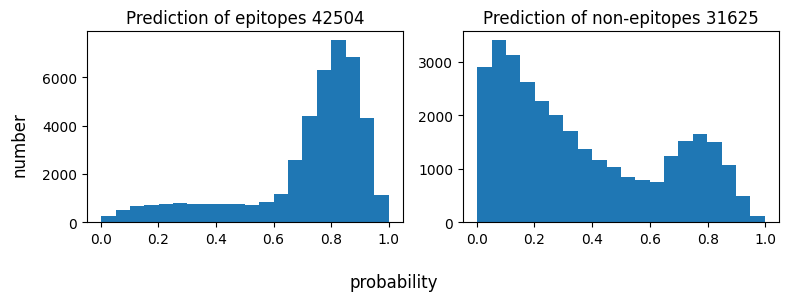

In [9]:
c.plot_prob()

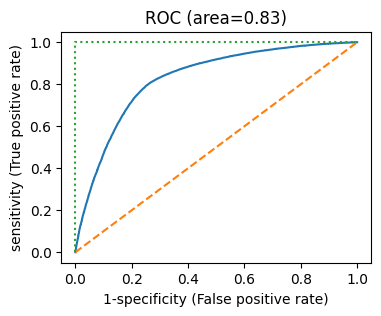

In [10]:
c.plot_roc()

In [11]:
# save entire model
c.save_model('../models/epitopes_ann_hasCys.keras')

<Sequential name=sequential, built=True>